### NYC Restaurants
#### Setup

In [1]:
# import req pandas libraries
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import numpy as np

# read data
df = pd.read_csv('NYC_Restaurants.csv', dtype = str)

Populating the interactive namespace from numpy and matplotlib


#### Question 1: Create a unique name for each restaurant
Converted all to uppercase and added spaces between each field.

In [2]:
df['RESTAURANT'] = (df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE'] + ' ' + df['BORO'])
df.iloc[:10,-1]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

#### Question 2
Created a Series of unique values of RESTAURANT, then counted those unique values.

In [3]:
restaurants = df['RESTAURANT'].value_counts()
rest_count = restaurants.count()
print(rest_count)

10114


#### Question 3
Created a Series of restaurants grouped by their DBA, then applied a mask to view only the DBAs with more than one restaurant.

In [4]:
rest_list = df.groupby('DBA').RESTAURANT.nunique()
mask = df.groupby('DBA').RESTAURANT.nunique() > 1

rest_list[mask].count()

368

#### Question 4
Plotted top 20 chains by first sorting by descending values.

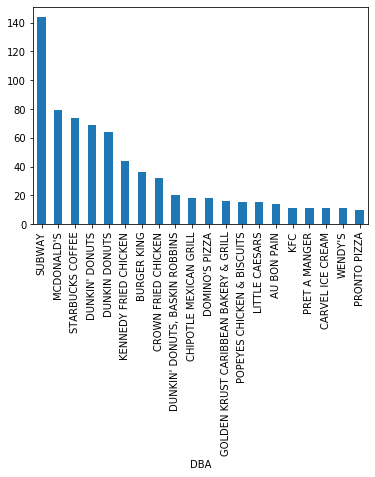

In [5]:
chains = rest_list[mask].sort_values(ascending = False)
chains[:20].plot(kind='bar')

#### Question 5
Created a new field called isChain, then applied a mask to view only restaurants that are chains. 

In [6]:
df['isChain'] = df['DBA'].isin(chains.index)
mask = df['isChain'] == True

chain_restaurants = df['RESTAURANT'][mask].value_counts()
chain_rest_count = chain_restaurants.count()
print(chain_rest_count/rest_count)

0.16472216729286138


#### Question 6
Using the isChain field, grouped restaurants by boro that are not chains. 

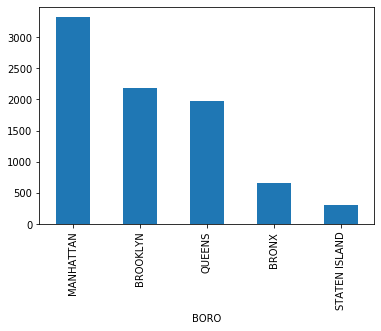

In [7]:
mask = df['isChain'] == False
non_chain_list = df[mask].groupby('BORO').RESTAURANT.nunique().sort_values(ascending = False)[:5]
non_chain_list.plot(kind='bar')

#### Question 7
Using the groups of restaurants that are not chains and the full restauarant list, grouped both lists and plotted the fractions.

The boro with the most independent restaurants (Manhattan) is **NOT** the same as the one with the highest ratio of independent restaurants (Brooklyn).

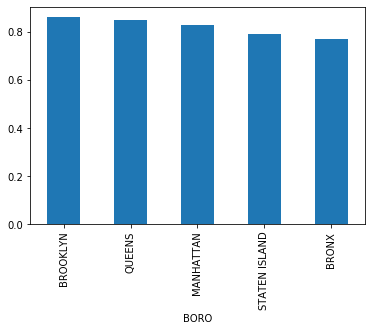

In [8]:
boro_list = df.groupby('BORO').RESTAURANT.nunique().sort_values(ascending = False)[:5]
non_chain_frac = non_chain_list / boro_list
non_chain_frac.sort_values(ascending=False).plot(kind='bar')

**Question 8**

Grouped the unique restaurant values by cuisine description and plotted the top 20 cuisines. 

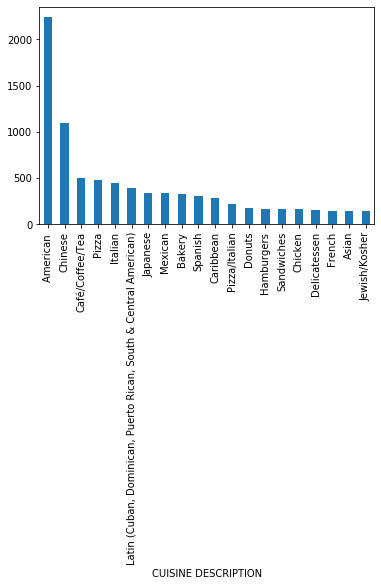

In [9]:
cuisine_list = df.groupby('CUISINE DESCRIPTION').RESTAURANT.nunique().sort_values(ascending = False)
cuisine_list[:20].plot(kind='bar')

**Question 9**

Counted the number of violations at each restaurant, then filtered by the restaurants where the total number of violations was 0, and grouped the unique restaurant values by cuisine description.

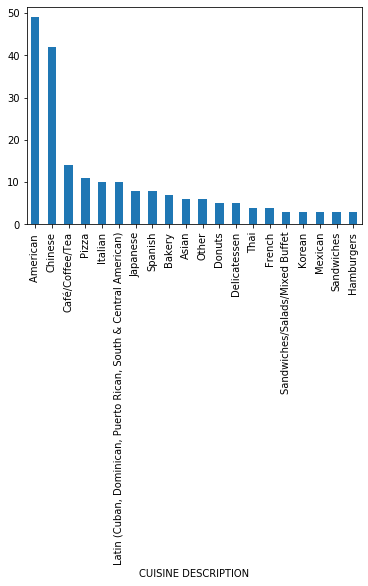

In [10]:
# counting the number of violations at each restaurant
#violation_count = Series(df.groupby('RESTAURANT')['VIOLATION CODE'].count().sort_values(ascending = True)==0)

violation_count = (df.groupby(['RESTAURANT'])[['VIOLATION CODE']].count().sort_values(by = 'VIOLATION CODE',ascending=True))

# created a list of restaurants where the violation count was 0 
no_violation_list = violation_count[violation_count.values == 0]
# added a column to the dataframe that indicates whether the restaurant never received a violation
df['noViolations'] = df['RESTAURANT'].isin(no_violation_list.index)

# created a mask on the dataframe to show only the restaurants that never received a violation
mask = df['noViolations'] == True

clean_rest = df[mask].groupby('CUISINE DESCRIPTION').RESTAURANT.nunique().sort_values(ascending = False)
clean_rest[:20].plot(kind='bar')

**Question 10**

Used the group by function to view cuisines that have at least 20 restaurants, then computed the ratio of counts in Q9 to Q8. 

In [11]:
# select cuisines where there's at least 20 restaurants representing that cuisine
mask = df.groupby('CUISINE DESCRIPTION').RESTAURANT.nunique().sort_values(ascending = False) >= 20

# for each cuisine, compute ratios of "clean" counts to total list
clean_ratio = (clean_rest/cuisine_list[mask])

# and show the top 10 cuisines with the highest ratios
clean_ratio.sort_values(ascending = False)[:10]

CUISINE DESCRIPTION
Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: RESTAURANT, dtype: float64

**Question 11**

Utilized crosstab and max index functions to see the count of violations in each boro.

In [12]:
pivoted = pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO'])

# updated options to view entire column
pd.options.display.max_colwidth = 275

# and removed the missing boro
DataFrame(pivoted.idxmax()).drop(['Missing'])

,0
BORO,
BRONX,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit."
BROOKLYN,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit."
MANHATTAN,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit."
QUEENS,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit."
STATEN ISLAND,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit."


**Question 12**

Divided each boro's violations by the total number of violations of that type to normalize the data.

In [13]:
# Get overall frequencies over the entire dataset
overall_freq = df['VIOLATION DESCRIPTION'].value_counts().sort_values(ascending = False)

# normalize the data, transposing to divide the num of violations for each boro by the total violation count
normalized = (pivoted.T/overall_freq).T

# find the biggest violations using idxmax and print the summary table
summary = normalized.idxmax()
pd.options.display.max_colwidth = 275
DataFrame(summary.T).drop(['Missing'])

,0
BORO,
BRONX,Unprotected food re-served.
BROOKLYN,"Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140º F within 2 hours."
MANHATTAN,Out-of package sale of tobacco products observed.
QUEENS,"Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes."
STATEN ISLAND,"Eggs found dirty/cracked; liquid, frozen or powdered eggs not pasteurized."


**Question 13**

There are 34 area codes that correspond to a single zip code. 

In [14]:
# extract the area code from each phone number
df['AREA CODE'] = df['PHONE'].astype(str).str[0:3]

#created a mask of the area codes that are for a single zip code
mask = df[['ZIPCODE','AREA CODE']].drop_duplicates()\
                            ['AREA CODE']\
                            .value_counts() == 1
print(Series(mask).value_counts())

True     34
False    22
Name: AREA CODE, dtype: int64


**Question 14**

Found some common misspellings of street names.

In [15]:
# create a new column called STREET TYPE
df['STREET TYPE'] = df['STREET'].str.split().str[-1]

# create column called STREET BASE
def create_base(c):
    str_list = c.split()
    base = str_list[0:len(str_list)-1]
    return ' '.join(base)

df['STREET BASE'] = df['STREET'].map(create_base)

# create column called STREET BASE & ZIP
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' + df['ZIPCODE']
df['STREET BASE & ZIP']

# create a table with just these 3 columns
mask = df['STREET BASE'].notnull()
new_table = df[['STREET BASE & ZIP','STREET TYPE','STREET BASE']][mask].copy().drop_duplicates()
new_table


# merge this table with itself on the street base and zip column
merged = new_table.merge(new_table,
                        left_on = 'STREET BASE & ZIP',
                        right_on = 'STREET BASE & ZIP')

# from the merged table, select only the rows where the street types are different
mask = merged['STREET TYPE_x'] != merged['STREET TYPE_y']
merged[mask]

# cross tab of the two distinct street types
pivoted = pd.crosstab(merged[mask]['STREET TYPE_x'], merged[mask]['STREET TYPE_y'])

# commonly used street type with these values
print(pivoted['AVE'].idxmax())
print(pivoted['ST'].idxmax())
print(pivoted['RD'].idxmax())
print(pivoted['PL'].idxmax())
print(pivoted['BOULEARD'].idxmax())
print(pivoted['BULEVARD'].idxmax())

AVENUE
STREET
ROAD
PLACE
BLVD
BLVD
